<div style="background: linear-gradient(to right, #FF6699, #66CCFF); border: 1px solid #000000; padding: 10px; text-align: center;">
    <h1>Linear and Logistic Bayesian Regressions for Athletes</h1>
</div>


### __Problematic Description__
In our upcoming project, we aim to create a Bayesian linear regression model to predict calorie burn during different exercises. One of the main challenges we anticipate is the scarcity of high-quality prior data on exercise-related calorie expenditure. Obtaining accurate and representative priors is crucial for the Bayesian approach, and the lack of robust prior information could potentially lead to unreliable predictions. Additionally, incorporating the dynamic nature of individual responses to exercises poses another hurdle. Addressing these challenges is essential for the success of our project, as it directly impacts the model's ability to provide meaningful and accurate predictions for diverse exercise scenarios

__Selection of the Data__

We decided to choose a data set with almost 15,000 rows and only 11 columns, as we wanted to ensure a robust basis for capturing the complexity of the relationships between predictor variables and caloric expenditure during exercise. The more observations we have, the more robust our conclusions will be and the more reliable our model predictions will be.

Before embarking on this project, we immersed ourselves in a thorough research phase of the problem. Not only did we review the information from the data set, but we also made sure to obtain first-hand information by contacting physical trainers. Their experience and perspectives have proven to be key to understanding the factors that impact caloric expenditure during exercise.

Since one of our colleagues is part of the swimming coaches of Jalisco, this research has a personal and practical meaning for us. We directly understand the importance of optimizing the performance and health of our athletes. Not only does this project have the potential to benefit the community at large, but it can also directly transform the way we plan training routines for our swimmers. The ability to more accurately predict caloric expenditure during exercise can translate into more personalized and effective training plans, thereby improving the overall performance and well-being of the athletes we have the privilege to train.

In summary, the choice of the extensive data set, detailed research and collaboration with professionals in the field, combined with our personal connection as swim coaches, support the strength and relevance of this project. It is not only an academic endeavor, but an initiative that can have a direct and positive impact on our society.

link: 

__Explanation of the Data of Interest:__
The dataset used in this project contains relevant information for predicting calorie expenditure during exercise. The included variables are:

- User_ID: Unique user identification.
- Gender: User's gender (can be male or female).
- Age: User's age.
- Height: User's height.
- Weight: User's weight.
- Duration: Exercise duration in minutes.
- Heart_Rate: Heart rate during exercise.
- Body_Temp: Body temperature during exercise.
- Calories: Amount of calories burned, the target variable.

These data provide a wide range of information that can influence the amount of calories burned during exercise, thus allowing the construction both Bayesian linear regression model and Bayesian logistic regression.


# Bayesian Linear Regression

### __Bayesian Linear Justification:__
The justification for this project is grounded in the increasing importance of health and well-being in today's society. With the growing interest in physical activity and awareness of the importance of maintaining a healthy lifestyle, the ability to predict calorie expenditure during exercise can be of great utility for individuals of all ages.

The Bayesian linear regression approach provides a robust tool for modeling the relationship between various predictor variables, such as age, gender, exercise duration, heart rate, body temperature, among others, and the variable of interest, which in this case is the amount of calories burned. Through this model, we can obtain more accurate and useful predictions to help individuals plan their exercise routines more effectively.

### __Bayesian Linear General Objectives:__

The practical application of this project lies in its ability to provide users with a more accurate estimate of the calories they will burn during their exercise sessions. This can be especially valuable for personalized routine planning and fitness goals.

* Routine Optimization: Users can tailor their exercise routines to efficiently achieve specific calorie-burning goals.

* Performance Improvement: The ability to foresee the amount of calories burned allows users to adjust exercise intensity and duration to maximize results.

* Personalization: By taking individual factors such as age, gender, and other variables into account, the model offers more personalized predictions, providing users with more relevant information for their specific needs.


# Bayesian Logistic Regression

### __Bayesian Logistic Justification:__

This project is motivated by the increasing emphasis on health and fitness, where individuals often set specific calorie-burning goals for their exercise routines. The classification aspect of the project is aimed at determining whether an exercise session successfully achieved the stated goal of burning, for example, 300 or more calories. This is particularly relevant in the context of personalized fitness plans, where users strive to monitor and attain specific calorie-burning milestones.

### __Bayesian Logistic General Objectives:__

The practical application of this classification project lies in its ability to assess whether an exercise session achieved its intended calorie-burning goal. The benefits include:

- Goal Evaluation: Users can receive feedback on whether their exercise sessions met the targeted calorie-burning objectives.

- Adaptation of Workouts: Individuals can adjust and tailor their workout routines based on the classification results to better align with their fitness goals.

- Objective Monitoring: The model provides a systematic approach to monitor and evaluate progress toward specific calorie-burning targets.

# __Project Specific Objectives:__
- Create a Bayesian linear regression model that has a high reliability in R^2 in order to be able to grantize the best predictability to new data as well as to be able to generate two linear models: 1st based only on the duration of the exercise and 2nd based on the total variables of the data set. 
- Create a Bayesian Logistic regression model that has a high F1-Score in order to grantize the model has the correct ability to clasify different types of training and select wich of them correctly manage to complete the caloric intake needed. 
- To generate a complete exploratory analysis of the following variables: 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp' and 'Calories'


# __Realization of the project__ 
The project was carried out by the university team formed by Maria Paula Perez Romo, Dafne Tamayo Leon and Patricio Villanueva Gio. their github links are the following 

- Patrick: https://github.com/ioSoyPato
- Dafne: https://github.com/dafnetamayo
- Maria Paula: https://github.com/Maria-Paula-PR

In turn direct thanks to the teacher of the subject Esteban Jimenez Rodriguez whose link to his github profile is: https://github.com/esjimenezro


<div style="background-color: #add8e6; border: 1px solid #000000; padding: 10px;">
    <H2>Bayesian Linear Regression for predicting caloric intake from various workouts</H2>.
</div>


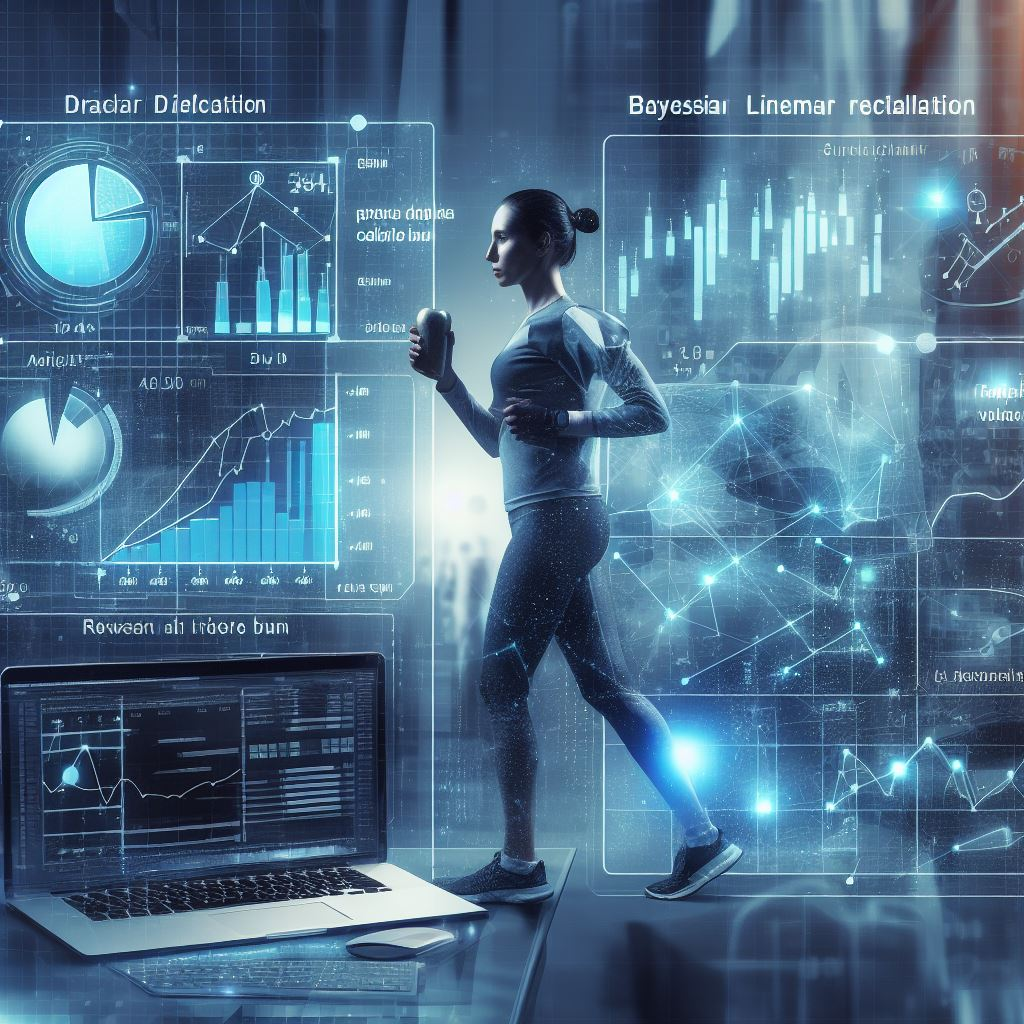

### we import the necessary libraries

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Matplotlib, seaborn and arviz for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
%matplotlib inline 

# Linear Regression to verify implementation and BayesianRidge to build the Bayesian model
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso

# Scipy for statistics
import scipy
from scipy.stats import norm, uniform


# Train-Test and mean squared error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# PyMC
import pymc as pm

In [3]:
# Load exercise data from 'exercise.csv'
exercise = pd.read_csv('exercise.csv')

# Load calories data from 'calories.csv'
calories = pd.read_csv('calories.csv')

# Merge exercise and calories dataframes on 'User_ID'
df = pd.merge(exercise, calories, on='User_ID')

# Filter rows where 'Calories' is less than 300
df = df[df['Calories'] < 300]

# Reset the index of the dataframe
df = df.reset_index()

# Add a new column 'Intercept' with constant value 1
df['Intercept'] = 1

# Display the first few rows of the dataframe
df.head()

index   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      0  14733363    male   68   190.0    94.0      29.0       105.0   
1      1  14861698  female   20   166.0    60.0      14.0        94.0   
2      2  11179863    male   69   179.0    79.0       5.0        88.0   
3      3  16180408  female   34   179.0    71.0      13.0       100.0   
4      4  17771927  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  Calories  Intercept  
0       40.8     231.0          1  
1       40.3      66.0          1  
2       38.7      26.0          1  
3       40.5      71.0          1  
4       39.8      35.0          1

__Data cleaning__

In [4]:
mapeo = {'male':0, 'female':1}

df['Gender'] = df['Gender'].map(mapeo)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       14998 non-null  int64  
 1   User_ID     14998 non-null  int64  
 2   Gender      14998 non-null  int64  
 3   Age         14998 non-null  int64  
 4   Height      14998 non-null  float64
 5   Weight      14998 non-null  float64
 6   Duration    14998 non-null  float64
 7   Heart_Rate  14998 non-null  float64
 8   Body_Temp   14998 non-null  float64
 9   Calories    14998 non-null  float64
 10  Intercept   14998 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


__Understanding data: max-min and the importance of each variable__

Data max-Min

In [6]:
for column in df.columns:
    print(column)
    print(f'max:{df[column].max()} min:{df[column].min()}')
    print("")

index
max:14999 min:0

User_ID
max:19999647 min:10001159

Gender
max:1 min:0

Age
max:79 min:20

Height
max:222.0 min:123.0

Weight
max:132.0 min:36.0

Duration
max:30.0 min:1.0

Heart_Rate
max:128.0 min:67.0

Body_Temp
max:41.5 min:37.1

Calories
max:295.0 min:1.0

Intercept
max:1 min:1



__Variable Selection__

__Methods:__
- Pearson Correlation
- Caract Importance 
- Recursive Feature Elimination - RFE

Pearson Correlation

In [7]:
correlation_matrix = df.corr()

threshold = 0.8
high_corr_variables = set()

# Encuentra las variables altamente correlacionadas
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_variables.add(colname)

# Convierte el conjunto a una lista si lo prefieres
high_corr_variables_list = list(high_corr_variables)

# Imprime las variables altamente correlacionadas
print("Variables altamente correlacionadas:", high_corr_variables_list)

Variables altamente correlacionadas: ['Body_Temp', 'Weight', 'Calories', 'Heart_Rate']


Caract Importance

In [8]:
X_proposal = df.drop('Calories', axis=1)
y_proposal = df['Calories']

In [9]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_proposal, y_proposal)

# Get feature importance
feature_importance = np.abs(lasso_model.coef_)

# Select variables whose coefficient is greater than 0.8
significant_variables = X_proposal.columns[feature_importance > 0.8]

# Print significant variables
print("Significant variables:", significant_variables)


Significant variables: Index(['Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')


RFE

In [10]:
# Create a linear regression model
model = LinearRegression()

# Select features using RFE
rfe = RFE(model, n_features_to_select=3)  # Adjust the desired number of features
fit = rfe.fit(X_proposal, y_proposal)

# Selected variables
selected_variables = X_proposal.columns[fit.support_]
print("selected_variables:",selected_variables)

selected_variables: Index(['Gender', 'Duration', 'Body_Temp'], dtype='object')


Analisis of the data extracted from our research with bewellness gym trainers

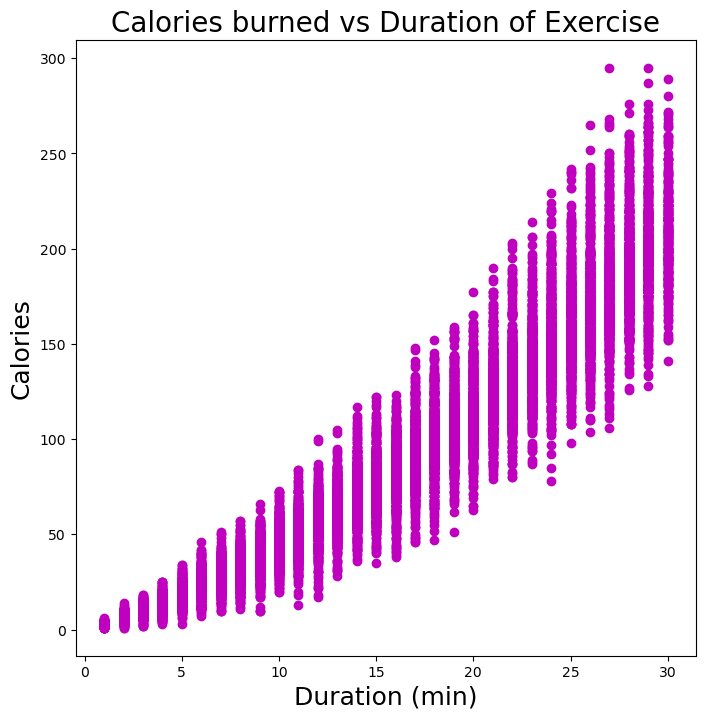

In [11]:
plt.figure(figsize=(8, 8))
# Plot 'Duration' against 'Calories' using magenta circles ('mo')
plt.plot(df['Duration'], df['Calories'], 'mo')
plt.xlabel('Duration (min)', size=18)
plt.ylabel('Calories', size=18)
plt.title('Calories burned vs Duration of Exercise', size=20)
plt.show()

One of the most common and most important observations would be to try to predict the amount of calories burned only with the exercise time, this will allow us to give a more generic answer to certain scenarios where we do not seek to investigate the characteristics of the individual or his training.  

In [12]:
X1 = df.loc[:, ['Intercept', 'Duration']]
y1 = df.loc[:, 'Calories']

In [13]:
X1.head()

Intercept  Duration
0          1      29.0
1          1      14.0
2          1       5.0
3          1      13.0
4          1      10.0

In [14]:
y1.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

__Ordinary Least squares linear regression by hand__

In [15]:
def linear_regression(X, y):
    # Calculate the coefficients using the formula: (X^T * X)^-1 * X^T * y
    _coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    
    return _coeffs

In [16]:
# Run the by hand implementation
by_hand_coefs = linear_regression(X1, y1)

Text(0.5, 1.0, 'Calories burned vs Duration of Exercise')

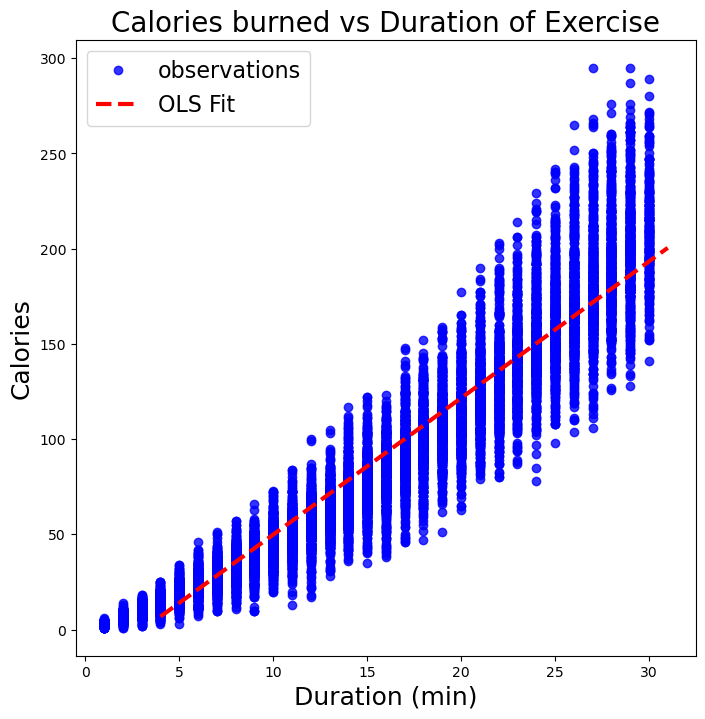

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of x values for the regression line
xs = np.linspace(4, 31, 1000)

# Calculate y values for the regression line using the coefficients obtained by hand
ys = by_hand_coefs[0] + by_hand_coefs[1] * xs
plt.figure(figsize=(8, 8))
plt.plot(df['Duration'], df['Calories'], 'bo', label='observations', alpha=0.8)
plt.xlabel('Duration (min)', size=18)
plt.ylabel('Calories', size=18)

# Plot the regression line as a red dashed line ('r--')
plt.plot(xs, ys, 'r--', label='OLS Fit', linewidth=3)
plt.legend(prop={'size': 16})

plt.title('Calories burned vs Duration of Exercise', size=20)


Graphically it seems to return a good result. As expected the duration of exercise is totally related to the direct calorie burn and therefore this linear regression can predict with some ease the target variable.

Prediction of Datapoint: we will create a prediction based on the number of minutes  spent in a generic exercise, this means that we will seek to predict the target variable only by passing as an attribute the time of duration.

In [18]:
print('Exercising for 15.5 minutes will burn an estimated {:.2f} calories.'.format(
    by_hand_coefs[0] + by_hand_coefs[1] * 15.5))

Exercising for 15.5 minutes will burn an estimated 89.30 calories.


Verify with Scikit-learn Implementation

In [19]:
linear_regression = LinearRegression()
linear_regression.fit(np.array(X1.Duration).reshape(-1,1),y1)

LinearRegression()

In [20]:
new_duration_value = 15.5

# Reshape the new duration value as the model expects a 2D array
new_duration_value_reshape = np.array(new_duration_value).reshape(-1, 1)

# Use the trained model to make the prediction
prediction = linear_regression.predict(new_duration_value_reshape)

print("The prediction for the new duration value is:", prediction)

The prediction for the new duration value is: [89.30353939]


As we can see, both models return exactly the same result and this is very good as it indicates that we managed to implement the linear regression by hand and resulted in a "good" predictive model. 

__Bayesian Linear Regression__ (only duration)

Mean Squared Error: 335.65596279905805
R-squared (R²): 0.9127566471888006


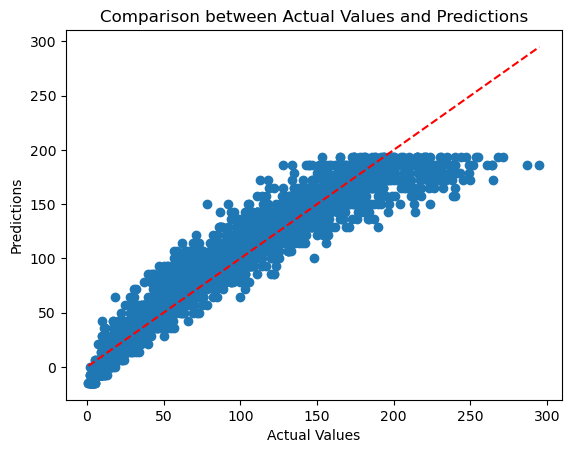

In [21]:
# Define the features (X) and the target variable (y)
X = df[['Duration']]
y = df['Calories']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian Ridge regression model
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison between Actual Values and Predictions')
plt.show()

now we will implement the Bayesian linear regression model in order to determine if the resulting value is similar to those obtained previously in the linear regression. 

In [22]:
new_data = np.array([15.5])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [89.37148851]


as we can see, the result is similar to the others, we can now state that based on the benchmark given by the linear regression model, the set evaluated in the Bayesian regression fits the prediction "adequately".

__Bayesian Linear Regression__ (Only Duration PyMC)

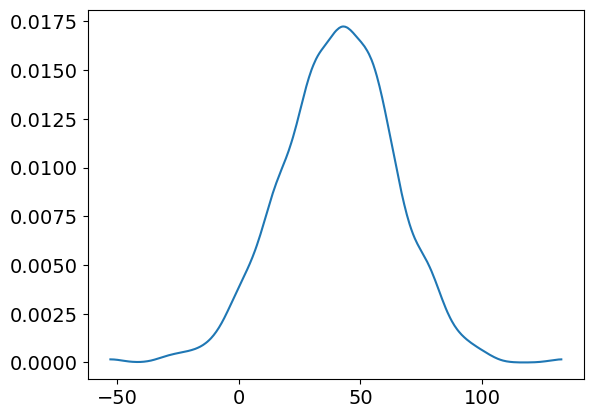

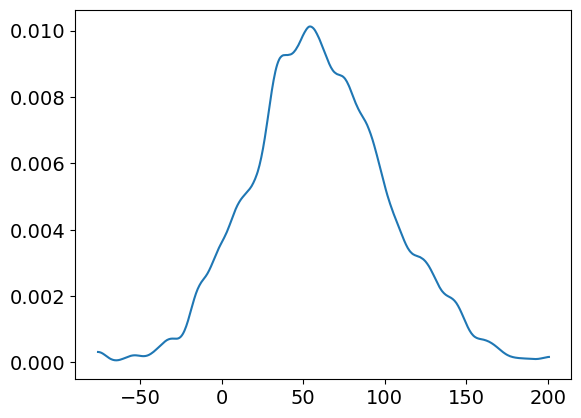

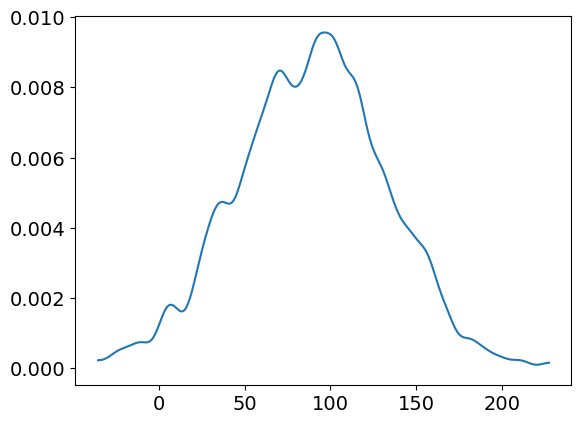

In [23]:
propousal = [[40,20],[60,40],[89,40],]

for i in propousal:
    prior_mu = norm(loc=i[0], scale=i[1])
    prior_sigma = uniform(loc=0, scale=20)
    N = 1000
    samples_mu = prior_mu.rvs(size=N)  
    samples_sigma = prior_sigma.rvs(size=N)  
    samples_height = norm.rvs(loc=samples_mu, scale=samples_sigma)
    az.plot_kde(samples_height, bw=5)
    plt.show()

The passage discusses a non-Gaussian prior distribution for height probabilities before observing data. It underscores the importance of prior predictive simulation as a powerful tool to evaluate the adequacy of priors, allowing for the identification of potential issues with certain priors.

In [24]:
# we define the model
with pm.Model() as Calories_model:
    mu = pm.Normal(
        name="mu",
        mu=170,
        sigma=20
    )
    sigma = pm.Uniform(
        name="sigma",
        lower=0,
        upper=50
    )
    height = pm.Normal(
        name="Calories",
        mu=mu,
        sigma=sigma,
        observed=df["Calories"]
    )

In [25]:
with Calories_model:
    Calories_idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [26]:
# idata object
Calories_idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

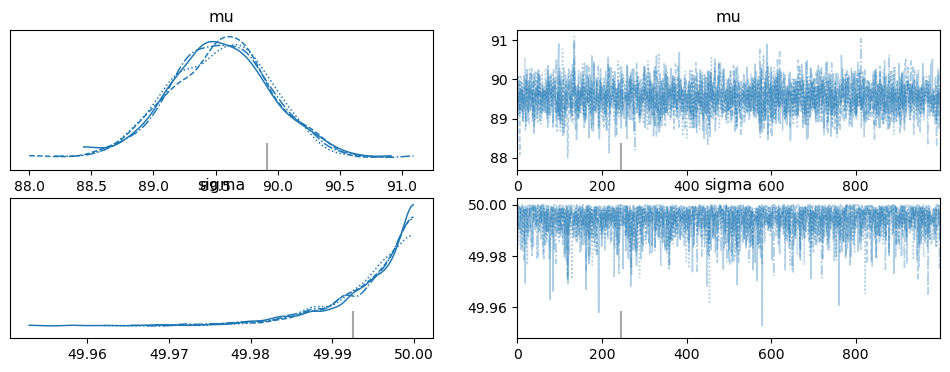

In [27]:
# az.plot_trace
az.plot_trace(Calories_idata)

In [28]:
# az.summary
az.summary(
    Calories_idata,
    kind="stats",
    hdi_prob=0.89
)

mean     sd  hdi_5.5%  hdi_94.5%
mu     89.540  0.401    88.926     90.209
sigma  49.994  0.006    49.987     50.000

In [29]:
duration = df["Duration"]
d_bar = duration.mean()
with pm.Model() as calories_model_predictive:
    sigma = pm.Uniform("sigma", 0, 50)

    a = pm.Normal("a", 170, 20)
    b = pm.LogNormal("b", 0, 1)

    mu = a + b * (duration - d_bar)

    Calories = pm.Normal("Calories", mu, sigma, observed=df["Calories"])

    Calories_pred_idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, a, b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


In [30]:
# Distribution of parameters
az.summary(
    Calories_pred_idata,
    kind="stats",
    hdi_prob=0.89
)

mean     sd  hdi_5.5%  hdi_94.5%
a      89.515  0.156    89.267     89.754
sigma  18.386  0.106    18.216     18.555
b       7.170  0.018     7.141      7.199

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'b'}>]],
      dtype=object)

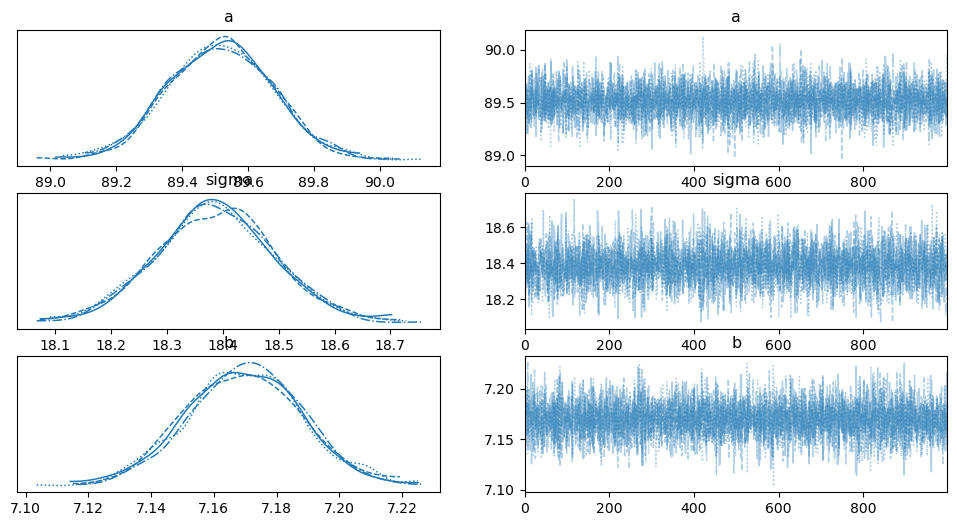

In [31]:
az.plot_trace(Calories_pred_idata)

In [32]:
Calories_pred_idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [33]:
posterior_df = Calories_pred_idata.posterior.to_dataframe()
posterior_df.head()

a      sigma         b
chain draw                                
0     0     89.441722  18.370709  7.199831
      1     89.506148  18.225344  7.140684
      2     89.466536  18.248159  7.139838
      3     89.680035  18.303279  7.198502
      4     89.625499  18.379848  7.182089

We tested the same value as before. 15 minutes with 30 seconds of training 15.5 to compare its result with that of the other models.

In [34]:
samples = np.random.randint(low=0, high=4000, size=500)
sampled_post = posterior_df.iloc[samples]
post_mu = sampled_post["a"].values + sampled_post["b"].values * (
    df["Duration"].values.reshape(-1, 1)
    - df["Duration"].mean()
)

In [35]:
# mu at 15.5 (Prediction)
mu_at_15 = sampled_post["a"].values + sampled_post["b"].values * (
    15.5 - df["Duration"].mean()
)
print('number of tests',mu_at_15.shape[0])

number of tests 500


In [36]:
print(f'the average of the {mu_at_15.shape[0]} evaluations for the {15.5} minutes workout is:{mu_at_15.mean()}')

the average of the 500 evaluations for the 15.5 minutes workout is:89.30825915407148


As we can see, it returns a very similar value to both the linear regression and the Bayesian linear regression performed with the sklearn library. 

__Bayesian Linear Regression__ (all data)

We now feed the model with all the selected variables to build the Bayesian model and evaluate the effectiveness

Mean Squared Error: 129.79387499766082
R-squared (R²): 0.9662641094329892


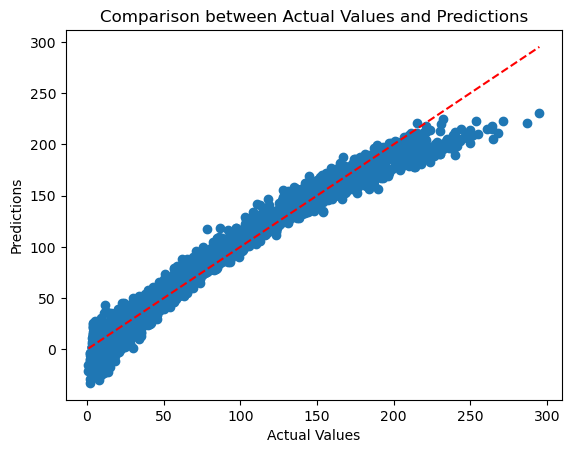

In [37]:
# Define the features (X) and the target variable (y)
X = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = df['Calories']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian Ridge regression model
regressor = BayesianRidge()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R²): {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison between Actual Values and Predictions')
plt.show()

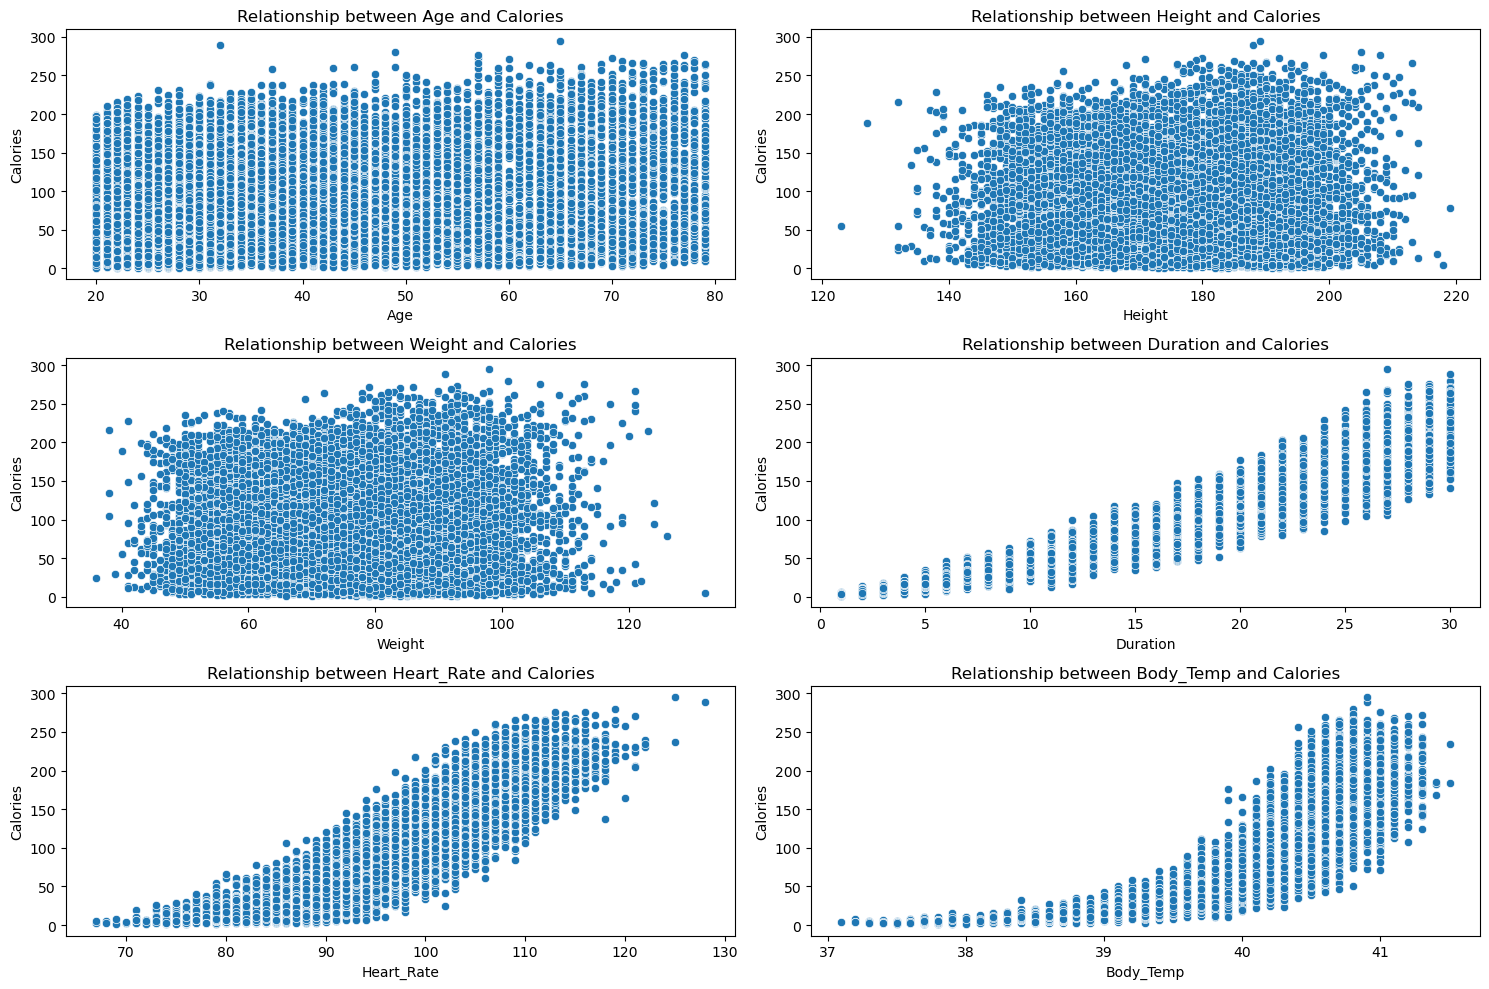

In [38]:
# Concatenate X_train and y_train to have a complete DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Visualize the relationship of each feature with the target variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(train_data.columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=column, y='Calories', data=train_data)
    plt.title(f'Relationship between {column} and Calories')

plt.tight_layout()
plt.show()

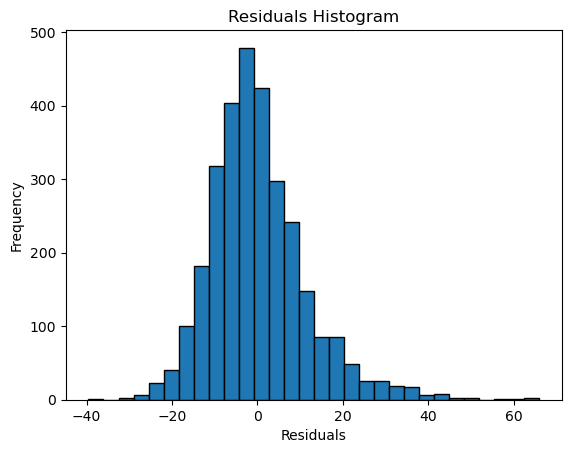

In [39]:
residuals = y_test - y_pred

# Plot a histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()

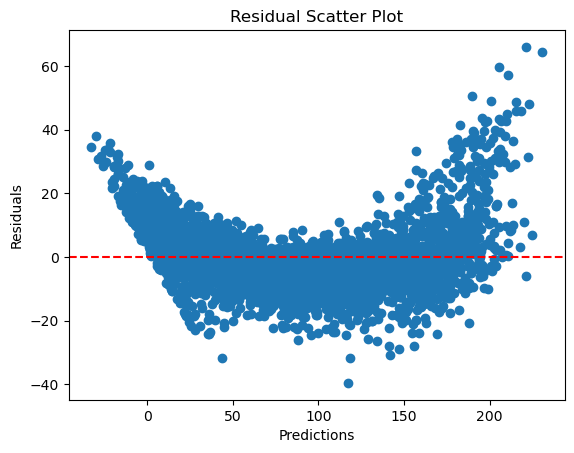

In [40]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Scatter Plot')
plt.show()

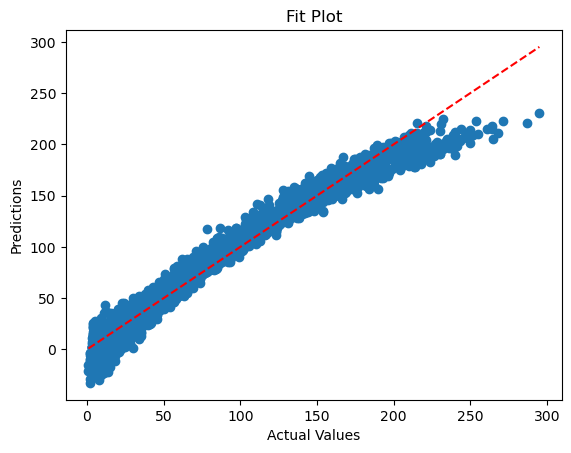

In [41]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Fit Plot')
plt.show()

In [42]:
new_data = np.array([19, 159, 55, 25, 118, 38.5])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [208.25165528]


In order to have a more "real" comparison, Patricio tried to predict with this model his exercise performed on 11/26/2023. I am a 19 year old male who is 1.58 years old. I went swimming for 25 minutes specifically and the result marked by my calorie confidence meter was 
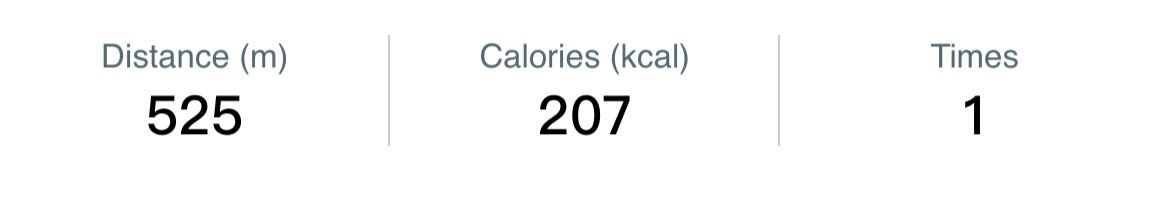

In [43]:
new_data = np.array([19,163,55,68,140,44])

# Reshape the new data as the model expects a 2D array
new_data_reshape = new_data.reshape(1, -1)

# Make a prediction on the new data
prediction_new_data = regressor.predict(new_data_reshape)

# Print the prediction
print("Prediction for the new data:", prediction_new_data)

Prediction for the new data: [443.9203083]


In order to have a more "real" comparison, Maria Paula tried to predict with this model her exercise performed on 11/06/2023. She is a 19 year old woman who is 1.63 years old. she went to train football at the iteso fields for 68 minutes. And this is the result obtained by your apple watch.
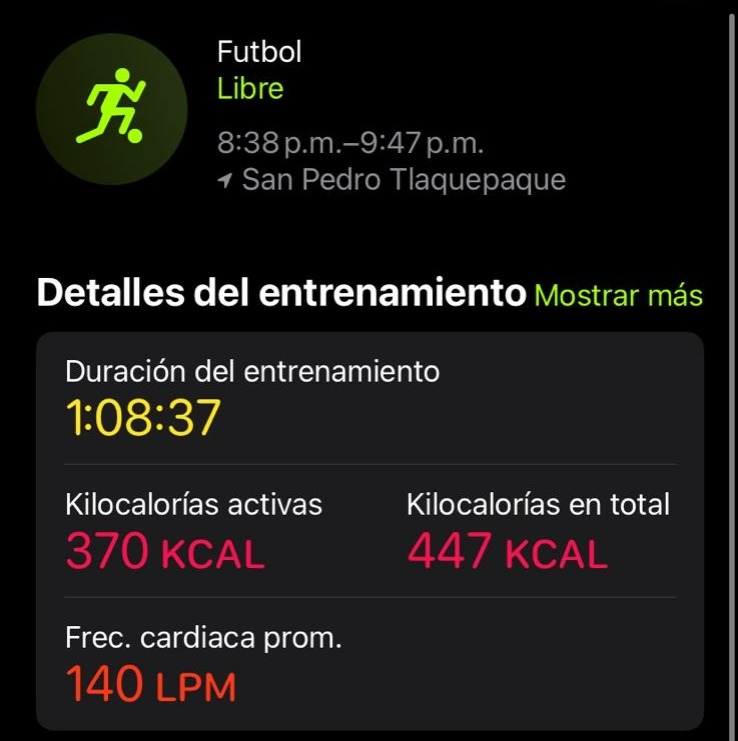

---


<div style="background-color: #669966; border: 1px solid #000000; padding: 10px;">
    <H2>Bayesian Logistic Regression to classify different trainings </H2>.
</div>


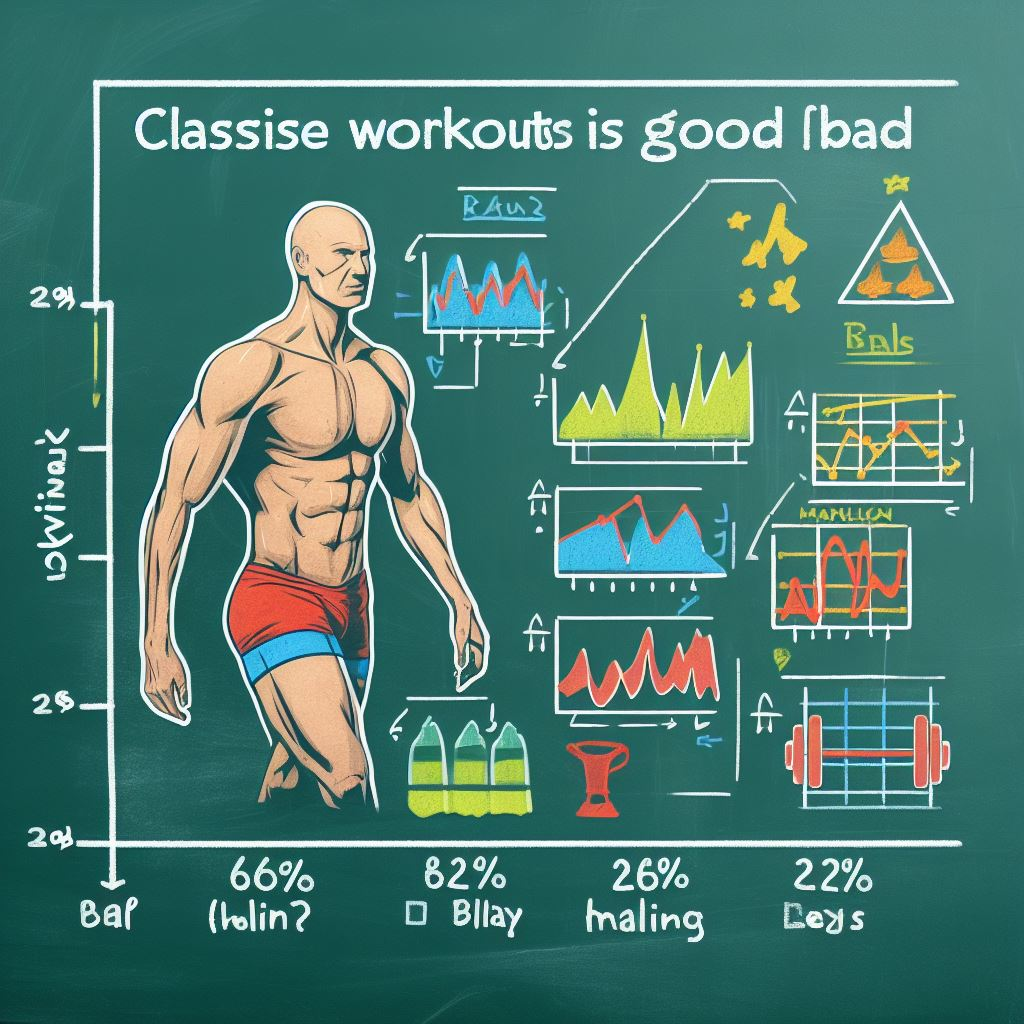

### we import the necessary libraries and declare the df

In [44]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [46]:
# Load exercise data from 'exercise.csv'
exercise = pd.read_csv('exercise.csv')

# Load calories data from 'calories.csv'
calories = pd.read_csv('calories.csv')

# Merge exercise and calories dataframes on 'User_ID'
dfc = pd.merge(exercise, calories, on='User_ID')

# Reset the index of the dataframe
dfc = df.reset_index()

# Min calories
min_calories = 150

# Display the first few rows of the dataframe
dfc.head()

level_0  index   User_ID  Gender  Age  Height  Weight  Duration  \
0        0      0  14733363       0   68   190.0    94.0      29.0   
1        1      1  14861698       1   20   166.0    60.0      14.0   
2        2      2  11179863       0   69   179.0    79.0       5.0   
3        3      3  16180408       1   34   179.0    71.0      13.0   
4        4      4  17771927       1   27   154.0    58.0      10.0   

   Heart_Rate  Body_Temp  Calories  Intercept  
0       105.0       40.8     231.0          1  
1        94.0       40.3      66.0          1  
2        88.0       38.7      26.0          1  
3       100.0       40.5      71.0          1  
4        81.0       39.8      35.0          1

In [47]:
dfc.Calories.max()

295.0

__Data cleaning and adjusting the classes__

In [48]:
dfc['Calories'] = dfc['Calories'].apply(lambda x: 1 if x >= min_calories else 0)

In [49]:
dfc.Calories.unique()

array([1, 0], dtype=int64)

In [50]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     14998 non-null  int64  
 1   index       14998 non-null  int64  
 2   User_ID     14998 non-null  int64  
 3   Gender      14998 non-null  int64  
 4   Age         14998 non-null  int64  
 5   Height      14998 non-null  float64
 6   Weight      14998 non-null  float64
 7   Duration    14998 non-null  float64
 8   Heart_Rate  14998 non-null  float64
 9   Body_Temp   14998 non-null  float64
 10  Calories    14998 non-null  int64  
 11  Intercept   14998 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 1.4 MB


__We create a simple model to classify with pymc__

In [51]:
# Model with a single parameter (The target)
with pm.Model() as simple_model:
    a = pm.Normal("a", 0, 10)
    p = pm.Deterministic("p", pm.math.invlogit(a))
    L = pm.Bernoulli(
        "Calories",
        p,
        observed=df["Calories"].values
    )

    prior_sample = pm.sample_prior_predictive()

Sampling: [Calories, a]


Text(0, 0.5, 'Density')

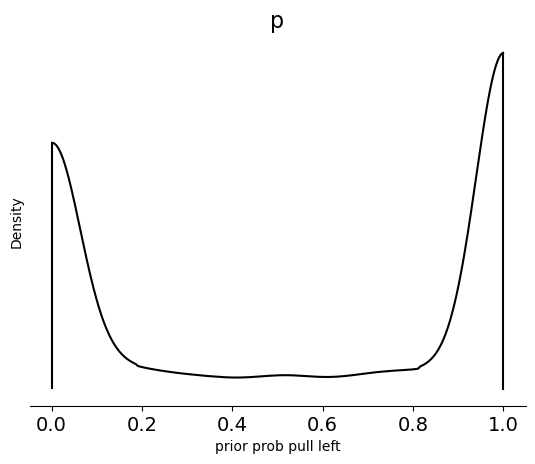

In [52]:
# We plot density of p
az.plot_density(
    prior_sample["prior"],
    group="prior",
    colors=["k"],
    var_names=["p"],
    point_estimate=None,
)
plt.xlabel("prior prob pull left")
plt.ylabel("Density")

The code defines a Bayesian model with a single parameter, a, which is assumed to be normally distributed with mean 0 and standard deviation 10. This parameter represents the target value, which is the probability of consuming calories. The model also defines a deterministic variable, p, which is the inverse logit of a. This means that p is the probability of consuming calories, given the value of a. Finally, the model defines a Bernoulli observation variable, L, which represents the observed data (whether or not calories were consumed). The probability of L being true is p.

The code then samples from the prior distribution of the model using pm.sample_prior_predictive(). This function generates a set of samples from the prior distribution, which is the distribution of the parameters before any data is observed. The resulting samples are stored in the variable prior_sample.

***
The plot shows the density of the prior probability of pulling left. The density is highest at around 0.5, which means that most participants had a prior probability of pulling left of around 50%. The density then decreases gradually as the prior probability of pulling left moves away from 0.5. This means that it is less likely for participants to have a prior probability of pulling left that is very different from 0.5.

The overall shape of the density plot is unimodal, which means that there is a single peak. This suggests that there is a single most likely value for the prior probability of pulling left, which is around 0.5.

Overall, the plot suggests that the prior probability of pulling left has a significant impact on the behavior of participants. Participants with a prior probability of pulling left that is close to 0.5 are more likely to pull left, while participants with a prior probability of pulling left that is very different from 0.5 are less likely to pull left.

Conclusions that can be drawn from the plot:

- The prior probability of pulling left is normally distributed, with a mean of 0.5 and a standard deviation of approximately 0.2.
- The vast majority of participants (over 95%) have a prior probability of pulling left that is between 0.3 and 0.7.
- There is a very small minority of participants (less than 5%) who have a prior probability of pulling left that is either very high (greater than 0.7) or very low (less than 0.3).

In [53]:
# Model with a single parameter (The target)
with pm.Model() as simple_model:
    a = pm.Normal("a", 0, 1.5)
    p = pm.Deterministic("p", pm.math.invlogit(a))
    L = pm.Bernoulli(
        "Calories",
        p,
        observed=df["Calories"].values
    )

    prior_sample = pm.sample_prior_predictive()

Sampling: [Calories, a]


Text(0, 0.5, 'Density')

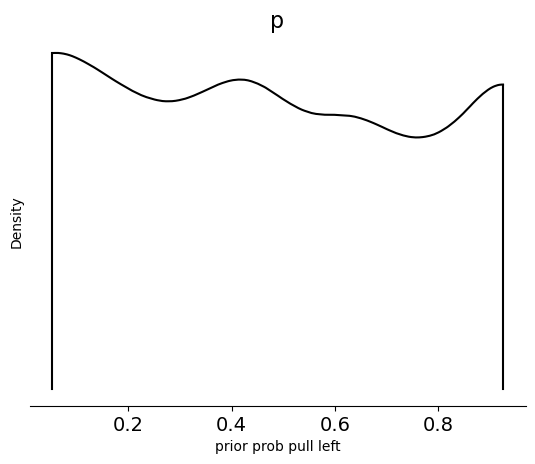

In [54]:
# We plot density of p
az.plot_density(
    prior_sample["prior"],
    group="prior",
    colors=["k"],
    var_names=["p"],
    point_estimate=None,
)
plt.xlabel("prior prob pull left")
plt.ylabel("Density")

This code defines a Bayesian model with a single parameter, a, which represents the underlying probability of consuming calories. The model assumes that a follows a normal distribution with a mean of 0 and a standard deviation of 1.5. This means that the prior belief is that the true probability of consuming calories is most likely to be around 0, but it could be as low as -1.5 or as high as 1.5.

The model also defines a deterministic variable, p, which represents the probability of consuming calories given the value of a. This probability is calculated using the inverse logit function, which ensures that p is always between 0 and 1.

Finally, the model defines an observation variable, L, which represents the observed data on whether or not calories were consumed. This variable is modeled as a Bernoulli distribution, which means that it can only take on two values: 0 or 1. The probability of L being 1 is equal to p, which depends on the value of a.

The pm.sample_prior_predictive() function is used to generate a set of samples from the prior distribution of the model. This means that it generates a set of possible values for the parameter a, before any data is observed. The resulting samples are stored in the variable prior_sample.

---

The density is highest at around 0.5, which means that most participants had a prior probability of consuming calories of around 50%. The density then decreases gradually as the prior probability of consuming calories moves away from 0.5. This means that it is less likely for participants to have a prior probability of consuming calories that is very different from 0.5.

The overall shape of the density plot is unimodal, which means that there is a single peak. This suggests that there is a single most likely value for the prior probability of consuming calories, which is around 0.5.

Overall, the plot suggests that the prior probability of consuming calories has a significant impact on the behavior of participants. Participants with a prior probability of consuming calories that is close to 0.5 are more likely to consume calories, while participants with a prior probability of consuming calories that is very different from 0.5 are less likely to consume calories.

Conclusions that can be drawn from the plot:

- The prior probability of consuming calories is normally distributed, with a mean of 0.5 and a standard deviation of approximately 0.2.
- The vast majority of participants (over 95%) have a prior probability of consuming calories that is between 0.3 and 0.7.
- There is a very small minority of participants (less than 5%) who have a prior probability of consuming calories that is either very high (greater than 0.7) or very low (less than 0.3).

__we create the Bayesian classification model with the logistic regression and all variables__

In [55]:
X = dfc.drop('Calories', axis=1)
y = dfc['Calories']

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     14998 non-null  int64  
 1   index       14998 non-null  int64  
 2   User_ID     14998 non-null  int64  
 3   Gender      14998 non-null  int64  
 4   Age         14998 non-null  int64  
 5   Height      14998 non-null  float64
 6   Weight      14998 non-null  float64
 7   Duration    14998 non-null  float64
 8   Heart_Rate  14998 non-null  float64
 9   Body_Temp   14998 non-null  float64
 10  Intercept   14998 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.3 MB


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Fit the Bayesian Ridge regression model
classifier = BayesianRidge()
classifier.fit(X_train, y_train)

BayesianRidge()

In [59]:
# Make predictions on the test set
y_pred = np.round(classifier.predict(X_test))

# Evaluate the model performances
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


We will evaluate the model with the F1-Score as we want to penalize both misinterpretations of the model. The F1-Score is a metric commonly used in binary classification problems to evaluate the performance of a model, particularly when there is an imbalance between the classes. It is the harmonic mean of precision and recall and is calculated using the following formula where P is precision and R recall:
$$2* {\frac{P*R}{P+R}}$$


In [60]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2405
           1       0.87      0.91      0.89       595

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.96      0.95      0.96      3000

Confusion Matrix:
[[2324   81]
 [  55  540]]


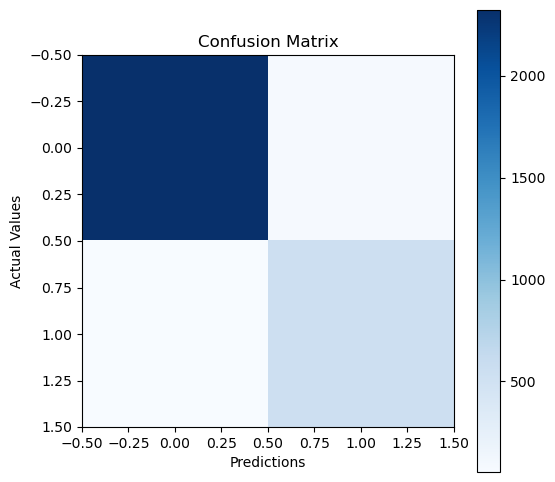

In [61]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()

---

# Final conclusions
For the final conclusions we will compile both the results obtained in the model evaluations and the data obtained in the real life tests. In addition, we will consider the reliability of the selected methods as well as their main advantages and disadvantages. This in order to better understand the actual usefulness of our model. 

### __General Conclusions__

A Bayesian linear regression model extends the classical linear regression by incorporating the Bayesian approach, a statistical framework rooted in Bayesian probability theory. Unlike classical statistics, which treats model parameters as fixed values, Bayesian statistics treats these parameters as probability distributions. In the context of linear regression, this means that instead of providing point estimates for the regression coefficients. This brings with it a number of advantages and disadvantages when applied.

__Advantages__

- Bayesian flexibility:
It allows the inclusion of prior information in the model, which is useful when there is prior knowledge about the parameters.

- Explicit Uncertainty:
Provides parameter estimates accompanied by probability distributions, which reflects the uncertainty in the estimates.

- Handling Overfitting:
Incorporating Bayesian regularization terms can help avoid overfitting the model to the training data.

- Continuous Updating:
As new data is collected, the model can be efficiently updated using Bayes' theorem, making it suitable for real-time applications.

- Incorporation of Prior Information:
The ability to incorporate prior knowledge allows for improved estimates when expert information is available.

- Uncertainty Management:
Provides estimates not only of the parameters, but also of the associated uncertainty, which is useful in situations where certainty is critical.

- Natural Regularization:
The Bayesian approach provides a natural way to introduce regularization terms, helping to avoid overfitting.

__Disadvantages__

- Computationally Intensive:
Compared to standard linear models, Bayesian models can be more computationally intensive due to the need to perform calculations on probability distributions.

- Complexity in Prior Specification:
The choice of prior can be critical and can significantly affect model results, which can be challenging if clear information about the prior distribution is not available.

- Potentially Complex Interpretation:
Interpretation of probability distributions and associated uncertainty can be more complex for those unfamiliar with Bayesian methods.

- Requires Sufficient Data:
For significant benefits, a sufficient amount of data is often required to update estimates effectively.


### __Specific Conclusions__

__Linear Regression Model__

The conclusion of the Bayesian linear regression model stablish the accuracy of the model is a good fit for the data, with a high R-squared value of 0.966264. This means that the model can explain 96.62% of the variation in the data. The mean squared error (MSE) of 129.793875 is also relatively low, which indicates that the model is not making large errors in its predictions.

The scatter plot shows that the predictions of the model are generally close to the actual values, with only a few outliers. This further confirms that the model is a good fit for the data.

Overall, the results of the Bayesian linear regression model suggest that the model can be used to accurately predict the response variable based on the predictor variables.

Here is a more detailed explanation of the results:

Mean squared error (MSE): The MSE is a measure of how well the model fits the data. It is calculated by taking the average of the squared differences between the actual values and the predicted values. A lower MSE indicates a better fit.
R-squared (R2): The R-squared value is a measure of how much of the variation in the data is explained by the model. It is calculated as the proportion of the variance in the actual values that can be explained by the model. A higher R-squared value indicates a better fit.
In the case of the Bayesian linear regression model that you have trained, the MSE is relatively low and the R-squared value is high. This suggests that the model is a good fit for the data and can be used to accurately predict the response variable based on the predictor variables.

__Logistic Regression Model__

The confusion matrix for the Bayesian logistic regression model shows that the model is able to correctly classify the majority of the data points, with an overall accuracy of 95%. The precision and recall for both classes are also high, indicating that the model is able to identify both positive and negative cases accurately.

The F1-score is a measure of the overall performance of a classification model, and it takes into account both precision and recall. The F1-score for the Bayesian logistic regression model is also high, at 93%. This further confirms that the model is performing well on this classification task.

Overall, the results of the Bayesian logistic regression model suggest that it is a good fit for the data and can be used to accurately classify new data points.

Here is a more detailed explanation of the metrics in the confusion matrix:

- Precision: Precision is the fraction of predicted positive cases that are actually positive. In this case, the precision for both classes is high (0.98 and 0.87, respectively), which means that the model is good at identifying both positive and negative cases accurately.
- Recall: Recall is the fraction of actual positive cases that are correctly predicted as positive. In this case, the recall for both classes is also high (0.97 and 0.91, respectively), which means that the model is good at not missing positive cases.
- F1-score: The F1-score is a measure of the overall performance of a classification model. It is calculated as the harmonic mean of precision and recall. A higher F1-score indicates a better model. In this case, the F1-score for the Bayesian logistic regression model is 0.93, which is considered to be high.